In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist["data"], mnist["target"]

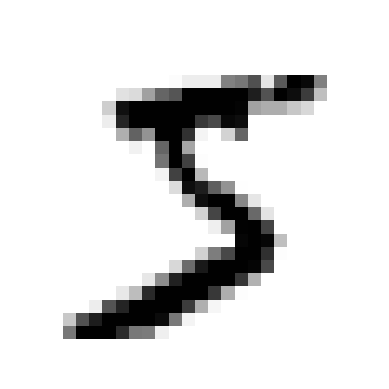

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc()[0].to_numpy()             #x is a dataframe X.iloc()[0] is the first row as a list which in this case describes the image of number 5
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Parameters:
hidden_layer_sizes: Tuple, for example, (100,) specifies one hidden layer with 100 neurons.
activation: The activation function for the hidden layer. Common choices include 'relu', 'tanh', and 'logistic'.
solver: The algorithm to use for weight optimization. Common choices are 'adam', 'lbfgs', and 'sgd'.
max_iter: Maximum number of iterations. Increase if the model does not converge.

Customizing the MLPClassifier
Layers and Neurons: You can customize the architecture by changing the hidden_layer_sizes parameter. For example, (100, 50) creates two hidden layers with 100 and 50 neurons, respectively.
layers 4,layer 1 input layer,layer 2 is one of the two hidden layers and has 100 neurons,
layer 3 is one of the two hidden layers and has 50 neurons,layer 4 output layer
Activation Function: The choice of activation function ('relu', 'tanh', 'logistic') can significantly affect model performance.
Solver: 'adam' is usually a good default choice, but 'lbfgs' might be better for small datasets, while 'sgd' can be more suitable for very large datasets.

Common Issues
Convergence Warning: If the model does not converge (i.e., reaches max_iter without finding the best weights), you can increase the max_iter value or change the solver to 'lbfgs' or 'sgd'.
Overfitting: You may need to regularize your model using alpha, increase the amount of data, or reduce the complexity of your neural network.

In [5]:
mlp_clf=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=42)

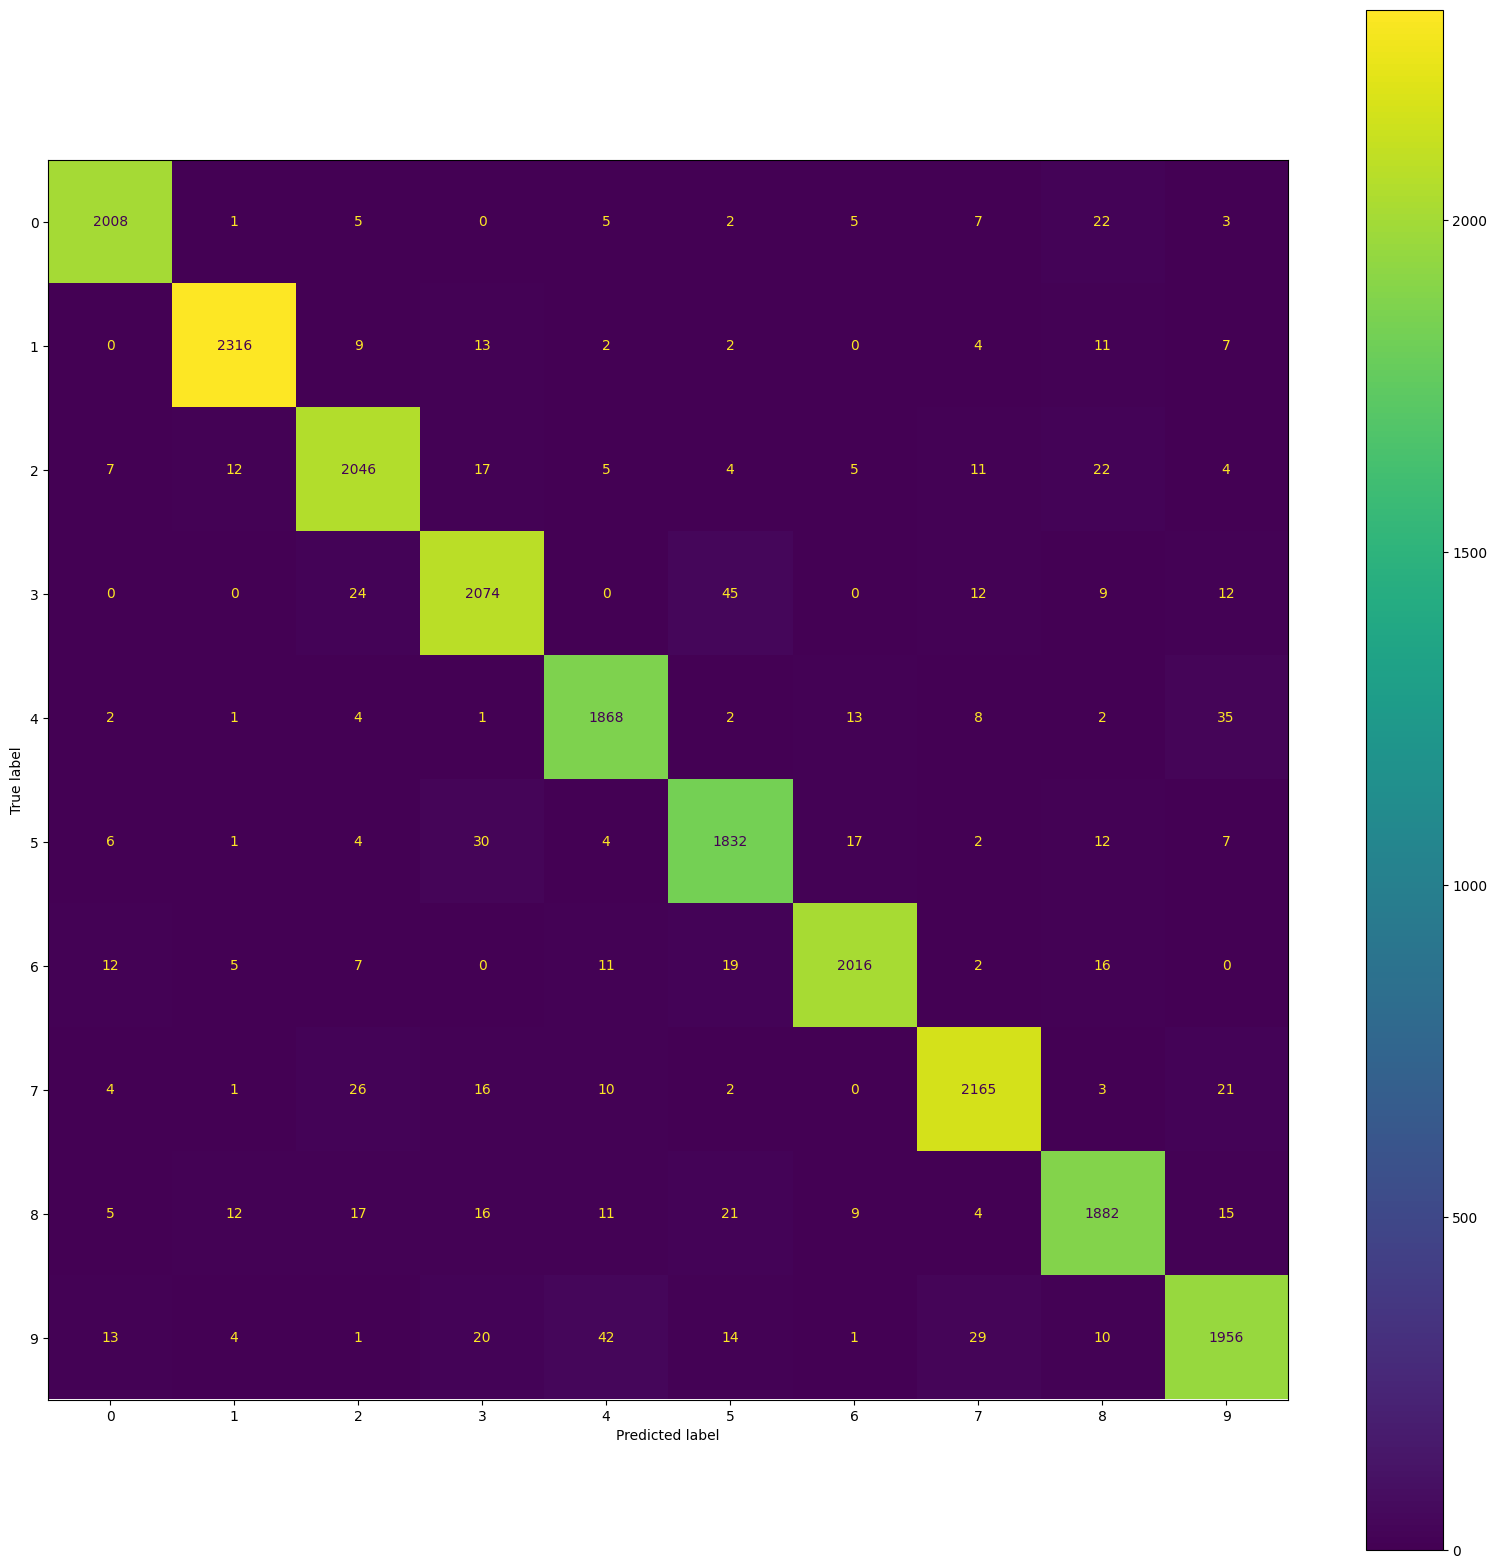

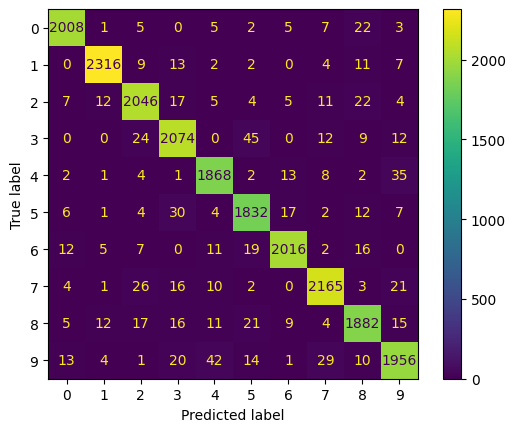

MutiLayerPerceptron Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.98      0.98      2364
           2       0.95      0.96      0.96      2133
           3       0.95      0.95      0.95      2176
           4       0.95      0.96      0.96      1936
           5       0.94      0.96      0.95      1915
           6       0.98      0.97      0.97      2088
           7       0.96      0.96      0.96      2248
           8       0.95      0.94      0.95      1992
           9       0.95      0.94      0.94      2090

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



In [7]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
y_pred=mlp_clf.predict(X_test)



# Plot confusion matrix with custom figure size
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the figsize as needed

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.plot(ax=ax)

plt.show()

print(f"MutiLayerPerceptron Classification Report:\n{classification_report(y_test, y_pred)}")